# **Stock (IHSG/JKSE) Predictive Modelling**

## **Data Load & Understanding**

In [443]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [444]:
# Connecting Google Drive and Google Colab
from google.colab import drive
drive.mount('/content/gdrive')

# Retrieve the dataset
dataset = '/content/gdrive/MyDrive/Project/Stock (IHSG) Prediction/Data/jkse_data_cleaned.csv'
df = pd.read_csv(dataset)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


The data used in the research in this code is data that has been cleaned/pre-processed, so that the existing data is ready to be used in the modeling stage.

In [445]:
# Display the contents of the dataset as a whole
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-04,6118.633789,6152.859863,6118.469238,6152.859863,6152.859863,65189800.0
1,2018-12-05,6097.644043,6133.120117,6064.832031,6133.120117,6133.120117,67897200.0
2,2018-12-06,6095.006836,6131.631836,6086.131836,6115.493164,6115.493164,65929300.0
3,2018-12-07,6108.950195,6141.470215,6103.176758,6126.355957,6126.355957,66079200.0
4,2018-12-10,6103.097168,6121.780762,6078.631836,6111.359863,6111.359863,56866400.0
...,...,...,...,...,...,...,...
1104,2023-11-27,7009.630859,7061.827148,7008.812988,7013.405762,7013.405762,163462500.0
1105,2023-11-28,7013.405762,7067.143066,7010.825195,7041.073242,7041.073242,167633600.0
1106,2023-11-29,7041.073242,7070.190918,7020.012207,7036.086914,7036.086914,167555900.0
1107,2023-11-30,7036.086914,7109.608887,7036.086914,7080.741211,7080.741211,259745500.0


In [446]:
# Checking the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1109 non-null   object 
 1   Open       1109 non-null   float64
 2   High       1109 non-null   float64
 3   Low        1109 non-null   float64
 4   Close      1109 non-null   float64
 5   Adj Close  1109 non-null   float64
 6   Volume     1109 non-null   float64
dtypes: float64(6), object(1)
memory usage: 60.8+ KB


In [447]:
# Check the number of columns and rows in the data
df.shape

(1109, 7)

In [448]:
# Shows a description of the data
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1.109000e+03
mean,6445.025133,6475.924740,6408.374643,6442.644916,6442.644916,1.507634e+08
std,481.718958,483.819788,481.615478,482.851872,482.851872,5.844165e+07
min,5075.001953,5093.825195,5059.088867,5075.797852,5075.797852,0.000000e+00
25%,6132.039063,6157.762207,6099.238770,6133.120117,6133.120117,1.105886e+08
50%,6460.265137,6484.195801,6428.470215,6455.352051,6455.352051,1.511679e+08
75%,6843.098145,6880.756836,6809.715820,6843.790039,6843.790039,1.886988e+08
max,7317.895996,7377.495117,7278.198242,7318.016113,7318.016113,3.007784e+08


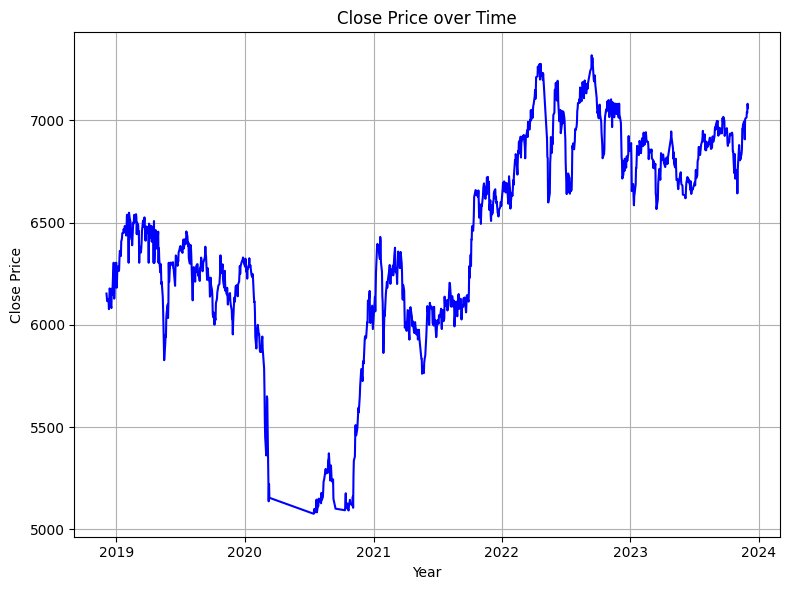

In [449]:
# Visualize the actual price of the 'Close' attribute by time

# Make sure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(8, 6))
plt.plot(df['Date'], df['Close'], linestyle='-', color='blue')

# Label the x and y axes
plt.xlabel('Year')
plt.ylabel('Close Price')

# Format the x-axis to display only the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Chart title
plt.title('Close Price over Time')

# Display the chart
plt.grid(True)
plt.tight_layout()
plt.show()

The visualization is the closing price (close) of JKSE which has been summarized and later predictions will be made to determine the value with several models that will be tried.

## **Data Pre-Processing**

In [450]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### **Data Splitting**

In [451]:
training_set = df.iloc[:, 4:5].values #creates a numpy array training_set

In [452]:
training_set.dtype

dtype('float64')

In [453]:
training_set

array([[6152.859863],
       [6133.120117],
       [6115.493164],
       ...,
       [7036.086914],
       [7080.741211],
       [7059.905762]])

In [454]:
training_set.shape

(1109, 1)

### **Normalization (Feature Scaling)**

In [455]:
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

In [456]:
training_set_scaled

array([[0.48035556],
       [0.47155189],
       [0.4636905 ],
       ...,
       [0.87426327],
       [0.8941785 ],
       [0.88488616]])

In [457]:
training_set_scaled.shape

(1109, 1)

### **Creating Data Structure**

In [458]:
X_train = training_set_scaled
Y_train = training_set_scaled

# Turning lists into Numpy arrays
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [459]:
X_train

array([[0.48035556],
       [0.47155189],
       [0.4636905 ],
       ...,
       [0.87426327],
       [0.8941785 ],
       [0.88488616]])

In [460]:
X_train.shape

(1109, 1)

### **Reshaping**

In [461]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [462]:
X_train

array([[[0.48035556]],

       [[0.47155189]],

       [[0.4636905 ]],

       ...,

       [[0.87426327]],

       [[0.8941785 ]],

       [[0.88488616]]])

## **Modelling & Evaluation**

### **Long Short-Term Memory (LSTM)**

In [463]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

#### **Building LSTM Architecture**

In [464]:
# Creating a LSTM model
lstm_model = Sequential()

# Adding a LSTM layer
lstm_model.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1],1)))
lstm_model.add(Dropout(0.25))
lstm_model.add(LSTM(units = 64, return_sequences = True))
lstm_model.add(Dropout(0.25))
lstm_model.add(LSTM(units = 64, return_sequences = True))
lstm_model.add(Dropout(0.25))
lstm_model.add(LSTM(units = 64, return_sequences = False))
lstm_model.add(Dropout(0.25))
lstm_model.add(Dense(units= 1))

# Compile the LSTM model
lstm_model.compile(optimizer = 'adam', loss = 'mean_squared_error')

#### **Training LSTM Model**

In [465]:
# Train the LSTM model
lstm_model.fit(X_train,Y_train, epochs = 100, batch_size = 32)

Epoch 1/100
35/35 [==============================] - 10s 13ms/step - loss: 0.2899
Epoch 2/100
35/35 [==============================] - 0s 9ms/step - loss: 0.0368
Epoch 3/100
35/35 [==============================] - 0s 7ms/step - loss: 0.0257
Epoch 4/100
35/35 [==============================] - 0s 8ms/step - loss: 0.0180
Epoch 5/100
35/35 [==============================] - 0s 9ms/step - loss: 0.0116
Epoch 6/100
35/35 [==============================] - 0s 8ms/step - loss: 0.0090
Epoch 7/100
35/35 [==============================] - 0s 8ms/step - loss: 0.0082
Epoch 8/100
35/35 [==============================] - 0s 8ms/step - loss: 0.0077
Epoch 9/100
35/35 [==============================] - 0s 8ms/step - loss: 0.0069
Epoch 10/100
35/35 [==============================] - 0s 8ms/step - loss: 0.0062
Epoch 11/100
35/35 [==============================] - 0s 8ms/step - loss: 0.0063
Epoch 12/100
35/35 [==============================] - 0s 8ms/step - loss: 0.0056
Epoch 13/100
35/35 [===============

#### **Testing LSTM Model**

In [466]:
dataset_test = df
real_stock_price = dataset_test.iloc[:,4:5].values
real_stock_price

array([[6152.859863],
       [6133.120117],
       [6115.493164],
       ...,
       [7036.086914],
       [7080.741211],
       [7059.905762]])

In [467]:
dataset_total = pd.concat((df['Close'], dataset_test['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test):].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [468]:
inputs

array([[0.48035556],
       [0.47155189],
       [0.4636905 ],
       ...,
       [0.87426327],
       [0.8941785 ],
       [0.88488616]])

In [469]:
inputs.shape

(1109, 1)

In [470]:
X_test = inputs
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [471]:
predicted_stock_price_lstm = lstm_model.predict(X_test)
predicted_stock_price_lstm = sc.inverse_transform(predicted_stock_price_lstm)

35/35 [==============================] - 2s 3ms/step


In [472]:
predicted_stock_price_lstm

array([[6137.7285],
       [6118.3066],
       [6100.993 ],
       ...,
       [6975.3813],
       [7011.754 ],
       [6994.909 ]], dtype=float32)

In [473]:
predicted_stock_price_lstm.shape

(1109, 1)

In [474]:
# Add the predicted values to the DataFrame
df['LSTM Predictions'] = predicted_stock_price_lstm

# Print or visualize the results as needed
df[['Date', 'Close', 'LSTM Predictions']]

,Date,Close,LSTM Predictions
0,2018-12-04,6152.859863,6137.728516
1,2018-12-05,6133.120117,6118.306641
2,2018-12-06,6115.493164,6100.993164
3,2018-12-07,6126.355957,6111.659180
4,2018-12-10,6111.359863,6096.937988
...,...,...,...
1104,2023-11-27,7013.405762,6956.526367
1105,2023-11-28,7041.073242,6979.492676
1106,2023-11-29,7036.086914,6975.381348
1107,2023-11-30,7080.741211,7011.753906


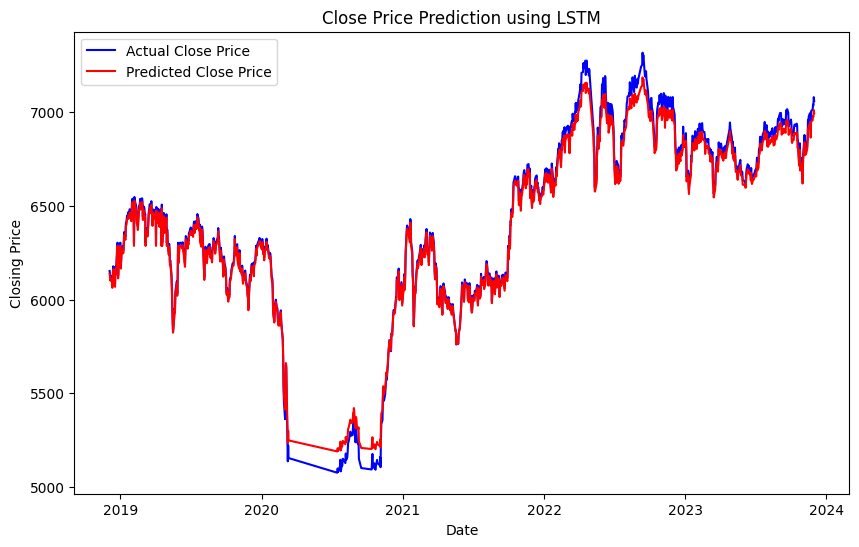

In [475]:
# Plot the actual closing prices and predictions
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Actual Close Price', color='blue')
plt.plot(df['Date'], df['LSTM Predictions'], label='Predicted Close Price', color='red')
plt.title('Close Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

#### **Model Evaluation**

In [476]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [477]:
# Perform prediction on training data
y_pred = lstm_model.predict(X_train)

# Calculate MSE
mse_lstm = mean_squared_error(Y_train, y_pred)

# Calculating RMSE
rmse_lstm = sqrt(mse_lstm)

# Calculating MAPE
mape_lstm = np.mean(np.abs((Y_train - y_pred) / np.maximum(1e-8, np.abs(Y_train)))) * 100

# Displaying results
print(f'Mean Squared Error (MSE): {mse_lstm}')
print(f'Root Mean Squared Error (RMSE): {rmse_lstm}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_lstm}%')

35/35 [==============================] - 0s 3ms/step
Mean Squared Error (MSE): 0.0003212247723150895
Root Mean Squared Error (RMSE): 0.017922744553083646
Mean Absolute Percentage Error (MAPE): 457155.3132602803%


#### **Saving LSTM Model**

In [495]:
from keras.models import load_model
lstm_model.save('LSTM_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### **Gated Recurrent Unit (GRU)**

In [479]:
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout

#### **Building GRU Architecture**

In [480]:
# Creating a GRU model
gru_model = Sequential()

# Adding a GRU layer
gru_model.add(GRU(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
gru_model.add(Dropout(0.25))
gru_model.add(GRU(units=64, return_sequences=True))
gru_model.add(Dropout(0.25))
gru_model.add(GRU(units=64, return_sequences=True))
gru_model.add(Dropout(0.25))
gru_model.add(GRU(units=64, return_sequences=False))
gru_model.add(Dropout(0.25))
gru_model.add(Dense(units=1))

# Compile the GRU model
gru_model.compile(optimizer='adam', loss='mean_squared_error')

#### **Training GRU Model**

In [481]:
# Train the GRU model
gru_model.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
35/35 [==============================] - 13s 7ms/step - loss: 0.1571
Epoch 2/100
35/35 [==============================] - 0s 7ms/step - loss: 0.0289
Epoch 3/100
35/35 [==============================] - 0s 7ms/step - loss: 0.0157
Epoch 4/100
35/35 [==============================] - 0s 8ms/step - loss: 0.0080
Epoch 5/100
35/35 [==============================] - 0s 8ms/step - loss: 0.0070
Epoch 6/100
35/35 [==============================] - 0s 8ms/step - loss: 0.0065
Epoch 7/100
35/35 [==============================] - 0s 7ms/step - loss: 0.0064
Epoch 8/100
35/35 [==============================] - 0s 8ms/step - loss: 0.0044
Epoch 9/100
35/35 [==============================] - 0s 8ms/step - loss: 0.0049
Epoch 10/100
35/35 [==============================] - 0s 8ms/step - loss: 0.0044
Epoch 11/100
35/35 [==============================] - 0s 7ms/step - loss: 0.0045
Epoch 12/100
35/35 [==============================] - 0s 8ms/step - loss: 0.0037
Epoch 13/100
35/35 [================

#### **Testing GRU Model**

In [482]:
dataset_test = df
real_stock_price = dataset_test.iloc[:,4:5].values
real_stock_price

array([[6152.859863],
       [6133.120117],
       [6115.493164],
       ...,
       [7036.086914],
       [7080.741211],
       [7059.905762]])

In [483]:
dataset_total = pd.concat((df['Close'], dataset_test['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test):].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [484]:
inputs

array([[0.48035556],
       [0.47155189],
       [0.4636905 ],
       ...,
       [0.87426327],
       [0.8941785 ],
       [0.88488616]])

In [485]:
X_test = inputs
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [486]:
predicted_stock_price_gru = gru_model.predict(X_test)
predicted_stock_price_gru = sc.inverse_transform(predicted_stock_price_gru)

35/35 [==============================] - 2s 4ms/step


In [487]:
predicted_stock_price_gru

array([[6142.057 ],
       [6122.117 ],
       [6104.32  ],
       ...,
       [7033.0386],
       [7077.457 ],
       [7056.7446]], dtype=float32)

In [488]:
# Add the predicted values to the DataFrame
df['GRU Predictions'] = predicted_stock_price_gru

# Print or visualize the results as needed
df[['Date', 'Close', 'GRU Predictions']]

,Date,Close,GRU Predictions
0,2018-12-04,6152.859863,6142.057129
1,2018-12-05,6133.120117,6122.117188
2,2018-12-06,6115.493164,6104.319824
3,2018-12-07,6126.355957,6115.286621
4,2018-12-10,6111.359863,6100.146973
...,...,...,...
1104,2023-11-27,7013.405762,7010.435547
1105,2023-11-28,7041.073242,7038.003906
1106,2023-11-29,7036.086914,7033.038574
1107,2023-11-30,7080.741211,7077.457031


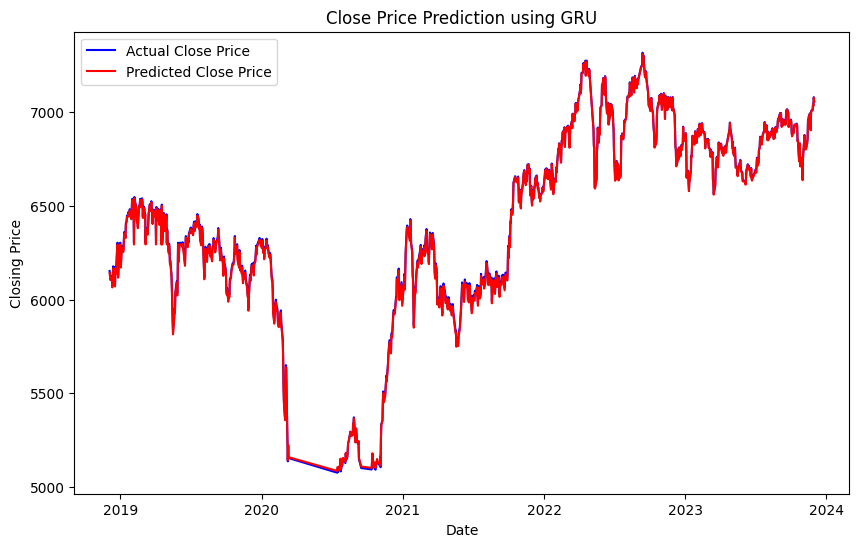

In [494]:
# Plot the actual closing prices and predictions
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Actual Close Price', color='blue')
plt.plot(df['Date'], df['GRU Predictions'], label='Predicted Close Price', color='red')
plt.title('Close Price Prediction using GRU')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

#### **Model Evaluation**

In [490]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [491]:
# Perform prediction on training data
y_pred = gru_model.predict(X_train)

# Calculate MSE
mse_gru = mean_squared_error(Y_train, y_pred)

# Calculating RMSE
rmse_gru = sqrt(mse_gru)

# Calculating MAPE
mape_gru = np.mean(np.abs((Y_train - y_pred) / np.maximum(1e-8, np.abs(Y_train)))) * 100

# Displaying results
print(f'Mean Squared Error (MSE): {mse_gru}')
print(f'Root Mean Squared Error (RMSE): {rmse_gru}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_gru}%')

35/35 [==============================] - 0s 4ms/step
Mean Squared Error (MSE): 1.1704594627786685e-05
Root Mean Squared Error (RMSE): 0.0034211978352306207
Mean Absolute Percentage Error (MAPE): 38259.917382133826%


#### **Saving GRU Model**

In [492]:
from keras.models import load_model
gru_model.save('GRU_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## **Conclusion**

In [493]:
model_comparison = pd.DataFrame({'Model': ['LSTM','GRU'], 'MSE': [mse_lstm*100,mse_gru*100], 'RMSE': [rmse_lstm*100,rmse_gru*100], 'MAPE': [mape_lstm*100,mape_gru*100]})
model_comparison

,Model,MSE,RMSE,MAPE
0,LSTM,0.032122,1.792274,4.571553e+07
1,GRU,0.001170,0.342120,3.825992e+06


Based on the results given for LSTM and GRU models in stock price prediction, we can draw some conclusions:

1. **Mean Squared Error (MSE):** The lower MSE value in the GRU model indicates that GRU has a better performance in minimising the mean squared error between the true and predicted values.

2. **Root Mean Squared Error (RMSE):** The lower RMSE value in the GRU model indicates that GRU provides a more accurate estimate and approximates the true value better than LSTM.

3. **Mean Absolute Percentage Error (MAPE):** The lower MAPE value in the GRU model indicates that GRU provides a more accurate estimate in absolute percentage error compared to LSTM.

**General Conclusions:** The GRU model provides better performance in terms of prediction error based on MSE, RMSE and MAPE values, suggesting that, in this context, GRU may be more effective in capturing sequential patterns and modelling sequential relationships in stock price data.